In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
files = files.upload()

Saving Bank Customer Churn Prediction.csv to Bank Customer Churn Prediction.csv


In [2]:
df=pd.read_csv('Bank Customer Churn Prediction.csv')

Kaggle Link->https://www.kaggle.com/datasets/gauravtopre/bank-customer-churn-dataset

The info on Kaggle.

customer_id, unused variable.

credit_score, used as input.

country, used as input.

gender, used as input.

age, used as input.

tenure, used as input.

balance, used as input.

products_number, used as input.

credit_card, used as input.

active_member, used as input.

estimated_salary, used as input.

churn, used as the target.

Aim is to Predict the Customer Churn for ABC Bank.
Every bank wants to hold there customers for sustaining their business so the ABC Multinational bank.

Below is the customer data of account holders at ABC Multinational Bank and the aim of the data will be predicting the Customer Churn.

As mentioned on Kaggle we will predicting that the customer will churn away or not.

We will be using Logistic Regresion for predicting the target value.


**1st Step **->We will starting by doing EDA of the data

Lets take a look at our dataset first

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [4]:
df.nunique()

,0
customer_id,10000
credit_score,460
country,3
gender,2
age,70
tenure,11
balance,6382
products_number,4
credit_card,2
active_member,2


In [5]:
df.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [6]:
df.isnull().sum()

,0
customer_id,0
credit_score,0
country,0
gender,0
age,0
tenure,0
balance,0
products_number,0
credit_card,0
active_member,0


In [16]:
df.head(10)

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,400,Germany,Female,29,4,115046.74,3,1,0,119346.88,1
8,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


As you can see,there is no missing values in data.
Now we can drop column we dont need

In [8]:
df=df.drop('customer_id',axis=1)

Looking for outliers

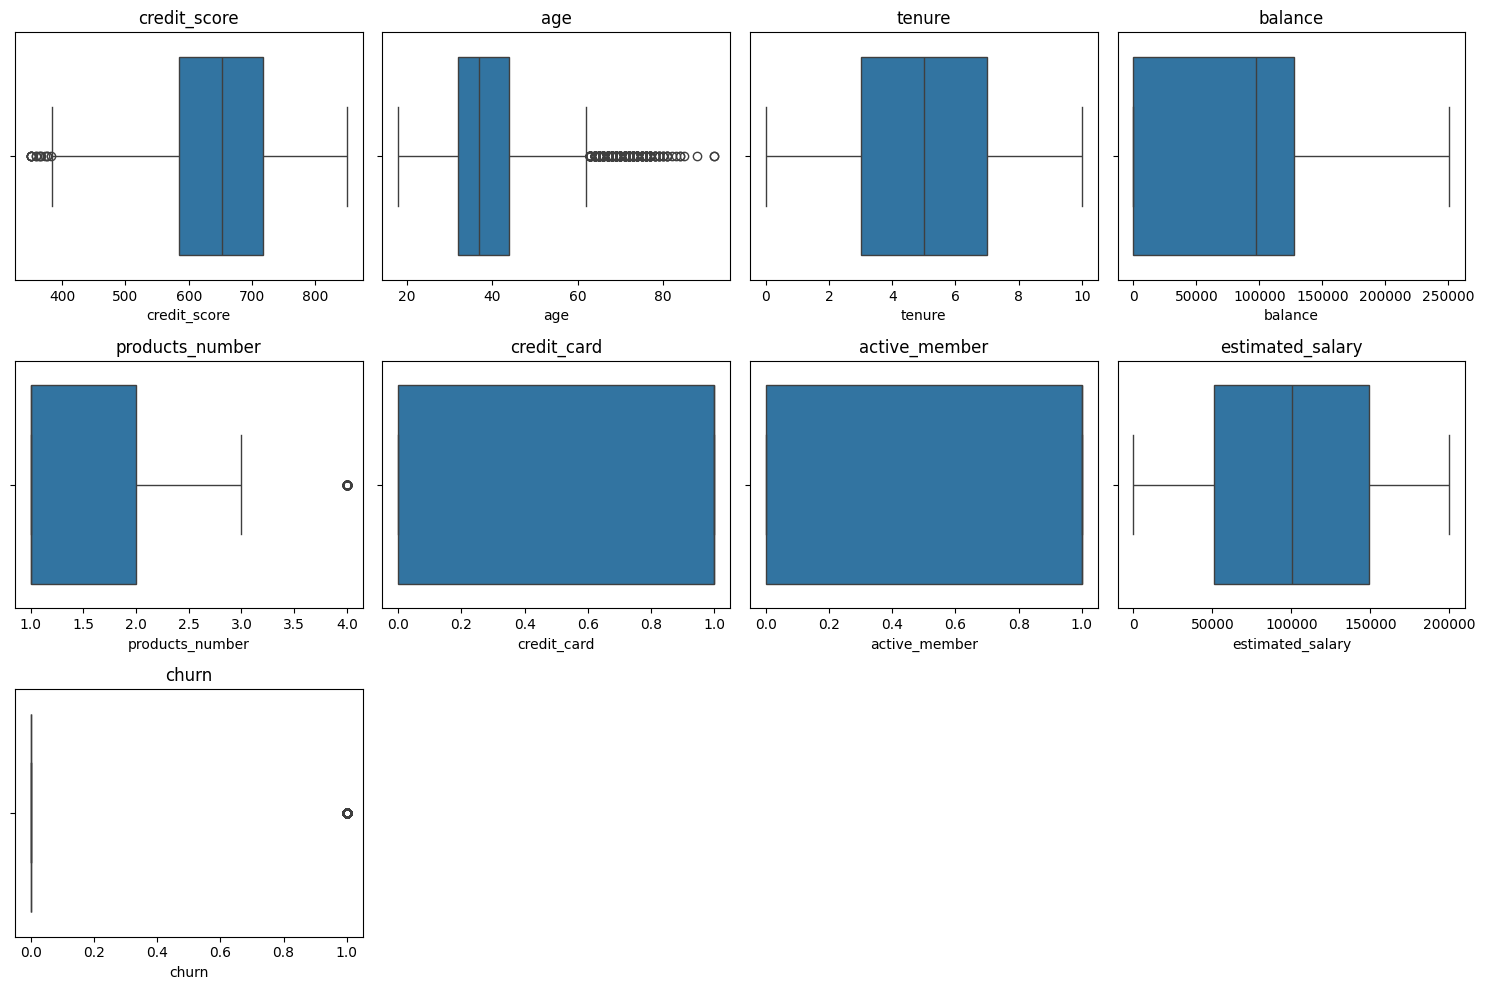

In [9]:
 #Select numerical columns
numerical_cols = df.select_dtypes(include=np.number).columns

# Create box plots for each numerical column
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 4, i + 1)  # Adjust subplot grid as needed
    sns.boxplot(x=df[col])
    plt.title(col)

plt.tight_layout()
plt.show()

In [10]:
#we only score 300 and 850 ,Outliers below 300 or above 850 are likely errors.
df['credit_score'] = df['credit_score'].clip(400, 850)
#Outliers beyond 80 look unrealistic in this dataset.
df['age'] = df['age'].clip(18, 60)
#product 4 is outlier and the data is also little
df['products_number'] = df['products_number'].clip(1, 3)


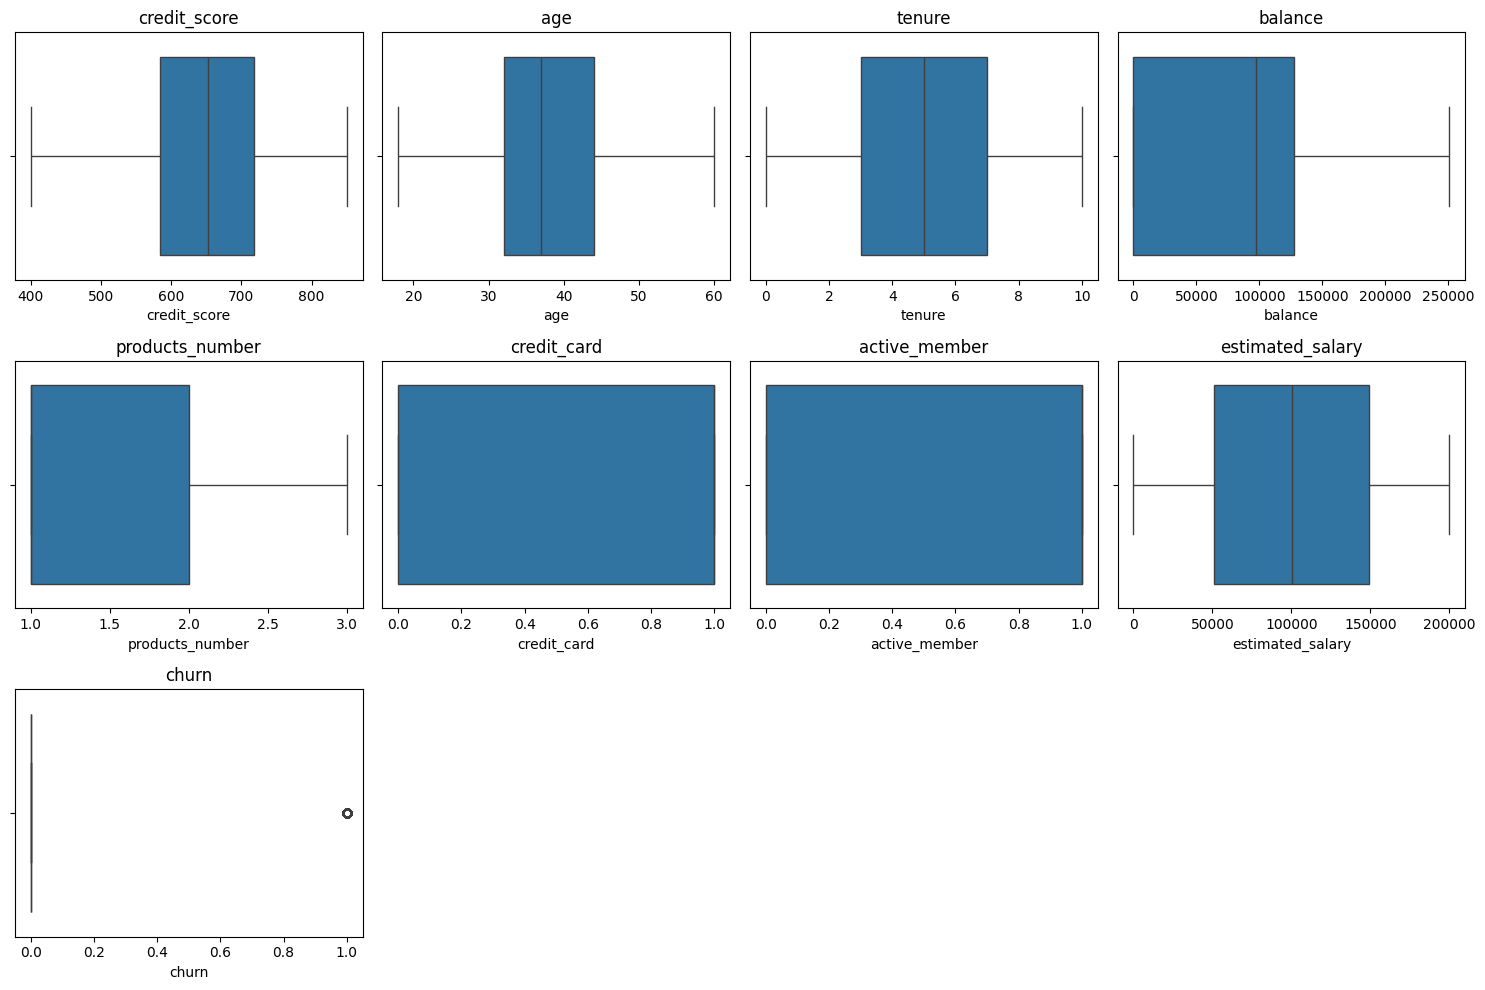

In [11]:
 #Select numerical columns
numerical_cols = df.select_dtypes(include=np.number).columns

# Create box plots for each numerical column
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 4, i + 1)  # Adjust subplot grid as needed
    sns.boxplot(x=df[col])
    plt.title(col)

plt.tight_layout()
plt.show()

Lets take a look at graphhs

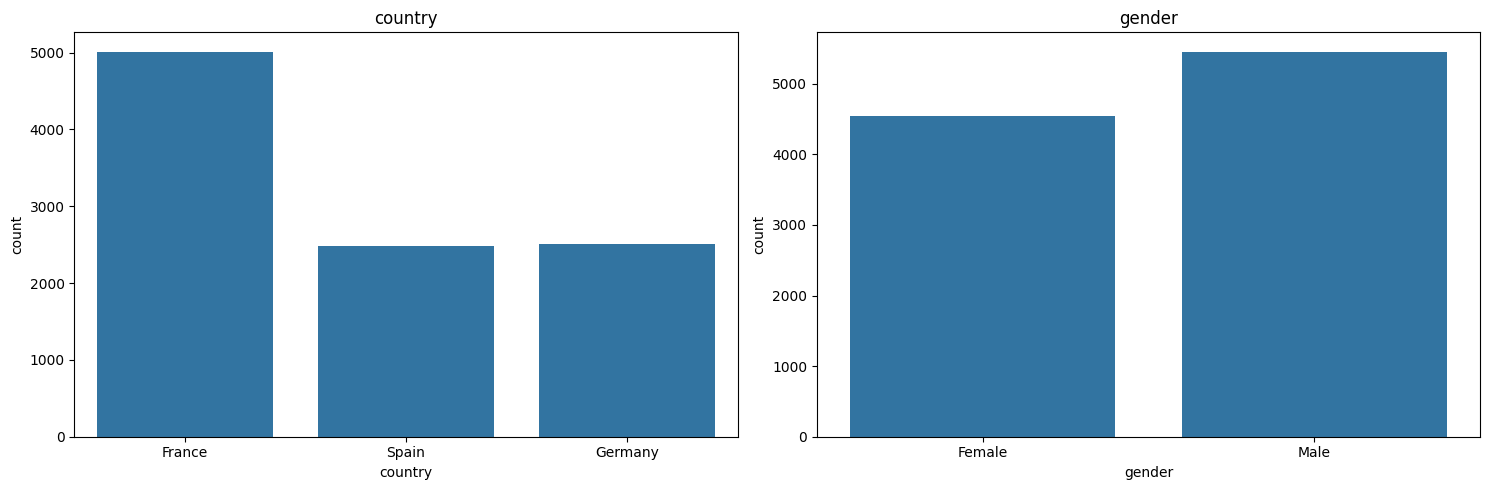

In [12]:

categorical_cols = df.select_dtypes(include='object').columns

plt.figure(figsize=(15, 5))
for i, col in enumerate(categorical_cols):
    plt.subplot(1, 2, i + 1)
    sns.countplot(x=df[col])
    plt.title(col)

plt.tight_layout()
plt.show()

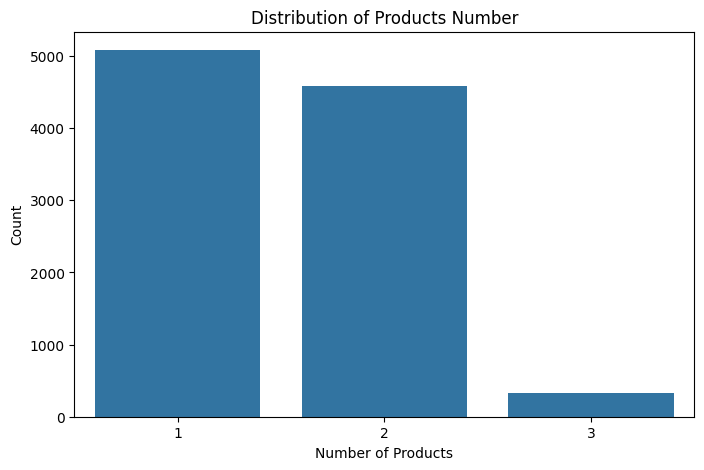

In [13]:

plt.figure(figsize=(8, 5))
sns.countplot(x=df['products_number'])
plt.title('Distribution of Products Number')
plt.xlabel('Number of Products')
plt.ylabel('Count')
plt.show()

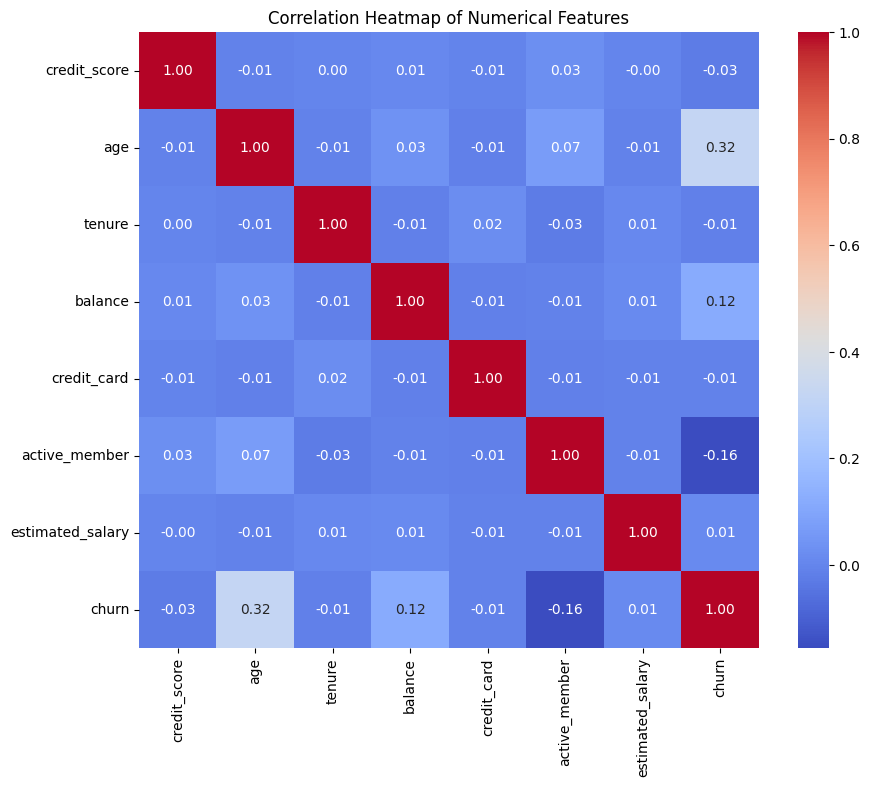

In [21]:
# Heat map of numeric features
numerical_cols_for_heatmap = df.select_dtypes(include=np.number).columns.drop('products_number')
plt.figure(figsize=(10, 8))
sns.heatmap(df[numerical_cols_for_heatmap].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

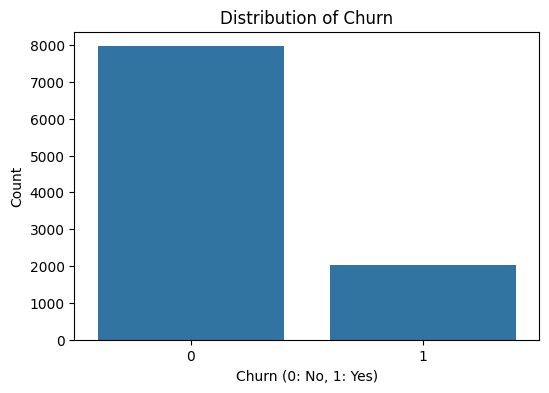

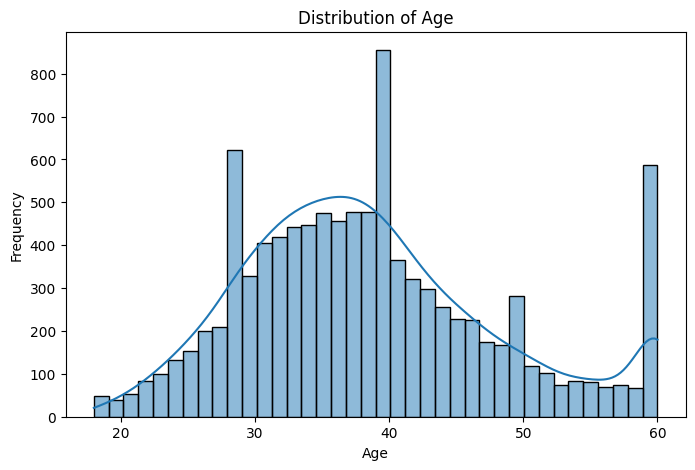

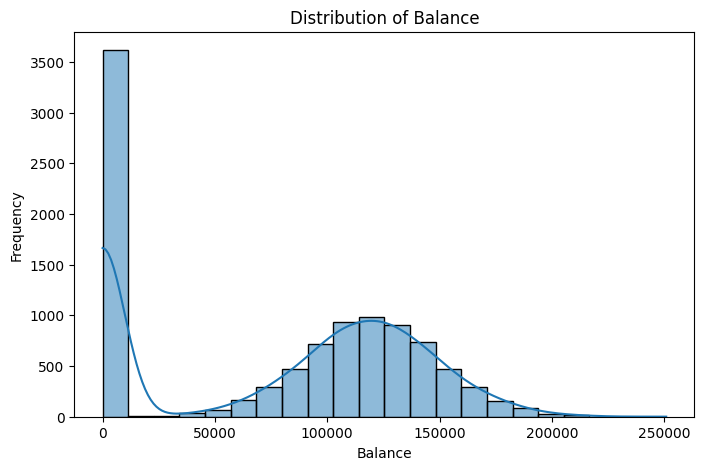

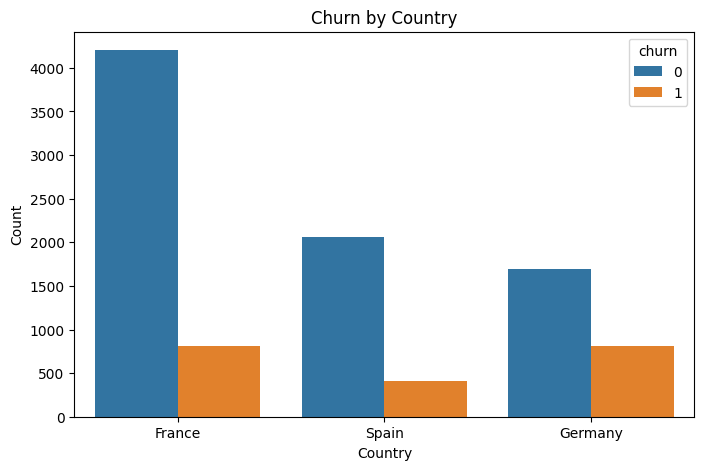

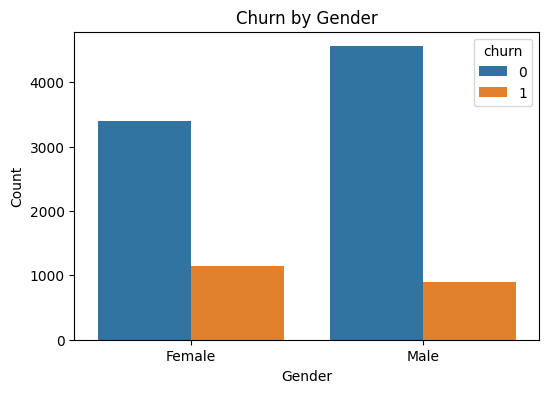

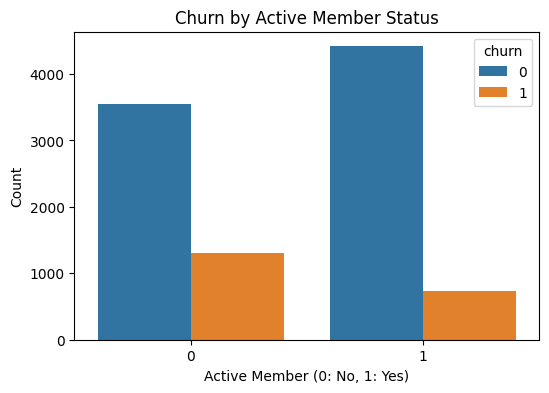

In [22]:

plt.figure(figsize=(6, 4))
sns.countplot(x='churn', data=df)
plt.title('Distribution of Churn')
plt.xlabel('Churn (0: No, 1: Yes)')
plt.ylabel('Count')
plt.show()


plt.figure(figsize=(8, 5))
sns.histplot(x='age', data=df, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(8, 5))
sns.histplot(x='balance', data=df, kde=True)
plt.title('Distribution of Balance')
plt.xlabel('Balance')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(8, 5))
sns.countplot(x='country', hue='churn', data=df)
plt.title('Churn by Country')
plt.xlabel('Country')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(6, 4))
sns.countplot(x='gender', hue='churn', data=df)
plt.title('Churn by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(6, 4))
sns.countplot(x='active_member', hue='churn', data=df)
plt.title('Churn by Active Member Status')
plt.xlabel('Active Member (0: No, 1: Yes)')
plt.ylabel('Count')
plt.show()